In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import optuna
np.set_printoptions(precision=4)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Rai dataset/df_cleaned.csv')

In [4]:
df.head(2)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No


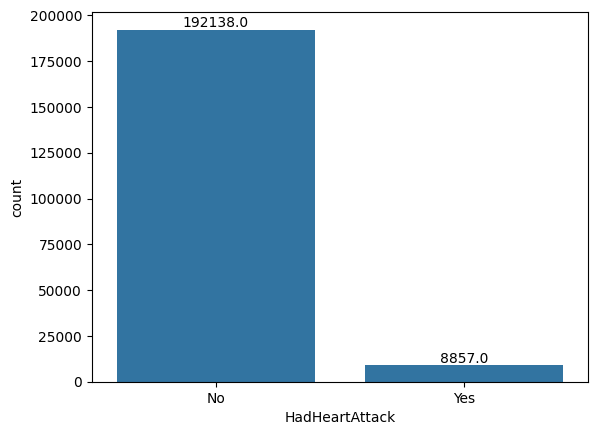

In [5]:
countplot=sns.countplot(data = df , x = "HadHeartAttack")

#annotate the bars of the graph
for bar in countplot.patches:
    countplot.text(bar.get_x() + bar.get_width()/2,
                  bar.get_height(), str(bar.get_height()),va='bottom',
                   ha= "center")

plt.show()

## Convert string into integers , LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
categorical_col =df.select_dtypes(exclude='number').columns
categorical_col

Index(['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [8]:
df.select_dtypes(exclude='object')

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4.0,0.0,9.0,1.60,71.67,27.99
1,0.0,0.0,6.0,1.78,95.25,30.13
2,0.0,0.0,8.0,1.85,108.86,31.66
3,5.0,0.0,9.0,1.70,90.72,31.32
4,3.0,15.0,5.0,1.55,79.38,33.07
...,...,...,...,...,...,...
200990,0.0,0.0,6.0,1.78,102.06,32.28
200991,0.0,7.0,7.0,1.93,90.72,24.34
200992,0.0,15.0,7.0,1.68,83.91,29.86
200993,2.0,2.0,7.0,1.70,83.01,28.66


In [9]:
encoder = LabelEncoder()
for col in categorical_col:
    df[col] = encoder.fit_transform(df[col])


df.head(3)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,4,4.0,0.0,3,1,9.0,3,0,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,1,4,0.0,0.0,3,1,6.0,3,0,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,1,4,0.0,0.0,3,0,8.0,1,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1


In [10]:
categorical_col =df.select_dtypes(exclude='number').columns
categorical_col

Index([], dtype='object')

- As we can see there is no string in the column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200995 entries, 0 to 200994
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        200995 non-null  int64  
 1   GeneralHealth              200995 non-null  int64  
 2   PhysicalHealthDays         200995 non-null  float64
 3   MentalHealthDays           200995 non-null  float64
 4   LastCheckupTime            200995 non-null  int64  
 5   PhysicalActivities         200995 non-null  int64  
 6   SleepHours                 200995 non-null  float64
 7   RemovedTeeth               200995 non-null  int64  
 8   HadHeartAttack             200995 non-null  int64  
 9   HadAngina                  200995 non-null  int64  
 10  HadStroke                  200995 non-null  int64  
 11  HadAsthma                  200995 non-null  int64  
 12  HadSkinCancer              200995 non-null  int64  
 13  HadCOPD                    20

## Data Split

In [12]:
X = df.drop("HadHeartAttack", axis =1)

#predicted class
y = pd.Series(data = df['HadHeartAttack'])

print(X.head(2))
print("The shape of X", X.shape)

print(50* "*")

print('the shape of y', y.shape)

   Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  LastCheckupTime  \
0    0              4                 4.0               0.0                3   
1    1              4                 0.0               0.0                3   

   PhysicalActivities  SleepHours  RemovedTeeth  HadAngina  HadStroke  ...  \
0                   1         9.0             3          0          0  ...   
1                   1         6.0             3          0          0  ...   

   HeightInMeters  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
0            1.60              71.67  27.99                0           0   
1            1.78              95.25  30.13                0           0   

   FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0             1              1                  1                 0         0  
1             1              1                  2                 0         0  

[2 rows x 38 columns]
The shape of X (200995, 38)
****

# SMOTE

- As we can see from countplot we have not balance data, for balancing the dataset, we use SMOTE, Therefore Somehow data can be close each bar

In [13]:
! pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:

smote_ = SMOTE(random_state=42, k_neighbors=4, sampling_strategy=.15)
smote_

SMOTE(k_neighbors=4, random_state=42, sampling_strategy=0.15)

In [16]:
data=smote_.fit_resample(X, y)

In [17]:
np.unique(y, return_counts=True)

(array([0, 1]), array([192138,   8857]))

In [18]:
data

(        Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
 0         0              4             4.00000          0.000000   
 1         1              4             0.00000          0.000000   
 2         1              4             0.00000          0.000000   
 3         0              1             5.00000          0.000000   
 4         0              2             3.00000         15.000000   
 ...     ...            ...                 ...               ...   
 220953    0              2             0.00000          0.000000   
 220954    0              4             0.00000          0.000000   
 220955    1              4             5.00000          0.000000   
 220956    1              2             0.99379          0.024839   
 220957    1              2             0.00000          0.000000   
 
         LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
 0                     3                   1    9.000000             3   
 1                    

In [19]:
data[0]

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,4,4.00000,0.000000,3,1,9.000000,3,0,0,...,1.600000,71.670000,27.990000,0,0,1,1,1,0,0
1,1,4,0.00000,0.000000,3,1,6.000000,3,0,0,...,1.780000,95.250000,30.130000,0,0,1,1,2,0,0
2,1,4,0.00000,0.000000,3,0,8.000000,1,0,0,...,1.850000,108.860000,31.660000,1,0,0,1,0,0,1
3,0,1,5.00000,0.000000,3,1,9.000000,3,0,0,...,1.700000,90.720000,31.320000,0,0,1,1,0,0,1
4,0,2,3.00000,15.000000,3,1,5.000000,0,0,0,...,1.550000,79.380000,33.070000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220953,0,2,0.00000,0.000000,3,1,10.756615,2,0,0,...,1.520000,63.844260,27.487540,0,0,0,0,2,0,0
220954,0,4,0.00000,0.000000,3,1,7.127904,3,0,0,...,1.630000,67.531164,25.556977,0,0,1,1,0,0,0
220955,1,4,5.00000,0.000000,3,1,7.000000,0,1,0,...,1.730000,84.058888,28.179848,0,0,0,0,1,0,0
220956,1,2,0.99379,0.024839,3,0,8.012419,3,0,0,...,1.830621,167.844096,50.151870,0,1,0,0,1,0,0


In [20]:
np.unique(data[1], return_counts=True)

(array([0, 1]), array([192138,  28820]))

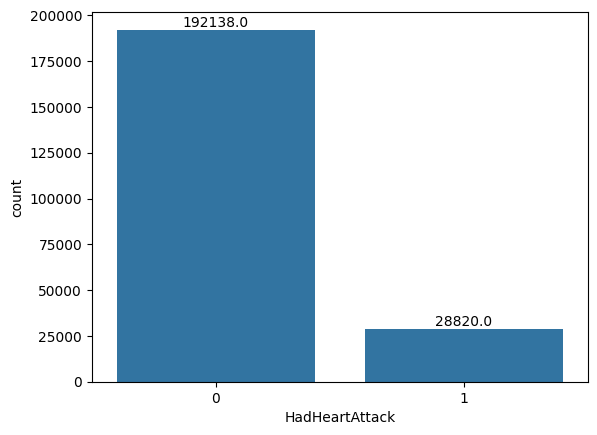

In [21]:
countplot=sns.countplot(data = df , x = data[1])

#annotate the bars of the graph
for bar in countplot.patches:
    countplot.text(bar.get_x() + bar.get_width()/2,
                  bar.get_height(), str(bar.get_height()),va='bottom',
                   ha= "center")

plt.show()

In [22]:
X = data[0]
y = data[1]

In [23]:
y

,HadHeartAttack
0,0
1,0
2,0
3,0
4,0
...,...
220953,1
220954,1
220955,1
220956,1


## Train - Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.10, shuffle=True, stratify=y)

print(f'X_train Shape {X_train.shape} & y_traim Shape {y_train.shape}')
print(f'X_test Shape {X_test.shape} & y_test Shape {y_test.shape}')

X_train Shape (198862, 38) & y_traim Shape (198862,)
X_test Shape (22096, 38) & y_test Shape (22096,)


# Auto encoder Dimension reduction

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model

# Dimensions
input_dim = X_train.shape[1]
encoding_dim = 4

# Encoder Part
input_layer = Input(shape=(input_dim,))
encoder = Dense(input_dim + 10, activation='tanh')(input_layer)
encoder = Dense(input_dim, activation='elu')(encoder)
encoder = BatchNormalization()(encoder)

encoder = Dense(input_dim // 2, activation='elu')(encoder)
encoder = BatchNormalization()(encoder)

encoder = Dense(input_dim // 4, activation='elu')(encoder)
encoder_output = Dense(encoding_dim, activation='linear')(encoder)

# Decoder Part
decoder = Dense(input_dim // 4, activation='elu')(encoder_output)
decoder = BatchNormalization()(decoder)

decoder = Dense(input_dim // 2, activation='elu')(decoder)
decoder = BatchNormalization()(decoder)

decoder = Dense(input_dim, activation='elu')(decoder)
decoder_output = Dense(input_dim, activation="linear")(decoder)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# Compile the Model
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss='mse',
                    metrics=['mae'])

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 14)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 1)                   │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 210 (840.00 B)

 Non-trainable params: 18 (72.00 B)

In [62]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25,
                               mode= 'min', verbose=1,
                               restore_best_weights=True)

#model .fit
Autoencoder_model = autoencoder.fit(X_train, X_train, epochs=3,
                                    batch_size=64,
                                    shuffle=False,
                                    validation_data=(X_test, X_test),
                                    callbacks=[early_stopping])


Epoch 1/3
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 104.1389 - mae: 5.7383 - val_loss: 70.9285 - val_mae: 4.8222
Epoch 2/3
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 64.0083 - mae: 4.6053 - val_loss: 36.9790 - val_mae: 3.7358
Epoch 3/3
3108/3108 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 29.7022 - mae: 3.4838 - val_loss: 14.1185 - val_mae: 2.7285
Restoring model weights from the end of the best epoch: 3.


## Model evaluation

***Train data***

In [63]:
autoencoder.evaluate(X_test, X_test, batch_size=64)

346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1940 - mae: 2.7398


[14.118546485900879, 2.728466749191284]

***Test data***

In [37]:
autoencoder.evaluate(X_test, X_test, batch_size=64)

346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3390 - mae: 0.3613


[0.3387738764286041, 0.3611355423927307]

In [65]:
X_train_reduced=autoencoder.predict(X_train)

6215/6215 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [68]:
X_train = pd.DataFrame(X_train_reduced)
X_train

,0,1,2,3
0,41.883617,0.422079,0.431713,0.465290
1,-13.252825,0.006803,-0.018567,-0.032842
2,3.699322,-0.151074,-0.196684,-0.252538
3,-14.717513,0.034139,0.020520,0.009531
4,-23.252691,0.227057,0.269654,0.286627
...,...,...,...,...
198857,8.824048,-0.147188,-0.212013,-0.260190
198858,14.325156,-0.069093,-0.167602,-0.185605
198859,15.292060,-0.051994,-0.152785,-0.166296
198860,-19.250317,0.132467,0.150364,0.153238


from matplotlib import pyplot as plt
X_train[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [67]:
X_test_reduced=autoencoder.predict(X_test)

691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [69]:
X_test = pd.DataFrame(X_test_reduced)
X_test

,0,1,2,3
0,5.525117,-0.163775,-0.203324,-0.264957
1,-5.787432,-0.072517,-0.161724,-0.180299
2,5.043729,-0.161752,-0.201240,-0.262331
3,14.940083,-0.058269,-0.158369,-0.173466
4,9.895822,-0.135958,-0.209341,-0.251682
...,...,...,...,...
22091,7.217563,-0.158898,-0.210720,-0.266561
22092,-6.719912,-0.068428,-0.150788,-0.169634
22093,-16.025715,0.060792,0.056950,0.049493
22094,-25.818321,0.288518,0.346981,0.372857


from matplotlib import pyplot as plt
X_test[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_test[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_test[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_test[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

# model save

In [ ]:
autoencoder.save('autoencoder_model.h5') # save the model in h5 format

## =================================================================================

# PCA
#### (In case autoencoder does not work)

In [38]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=4)
X_train_pca=pca.fit_transform(X_train)
X_train_pca

array([[ 41.1658,   0.5467,   0.7265,   1.7073],
       [-11.3306,  -1.2759,  -2.5406,  -0.5906],
       [  2.9319,  -2.7157,  -0.7913,  -0.8289],
       ...,
       [ 17.8195,   2.6539,  -2.2389,   4.331 ],
       [-17.5782,   0.2372,  -1.6379,   2.6384],
       [-14.8201,  -4.0074,   2.8319,   1.1701]])

In [51]:
print(pca.explained_variance_ratio_)

[0.8911 0.0327 0.0218 0.0172]


In [52]:
print(pca.singular_values_)

[9210.4449 1763.1446 1441.5157 1280.3295]


In [54]:
X_train = pd.DataFrame(X_train_pca)
X_train

,0,1,2,3
0,41.165835,0.546672,0.726463,1.707308
1,-11.330554,-1.275907,-2.540613,-0.590600
2,2.931876,-2.715715,-0.791301,-0.828898
3,-15.203325,-4.177386,3.341331,-1.150179
4,-34.082605,3.678089,-4.796624,4.579901
...,...,...,...,...
198857,9.474905,-2.811985,-1.989458,-2.473476
198858,18.021496,-2.859911,5.000716,0.100418
198859,17.819549,2.653899,-2.238907,4.331046
198860,-17.578153,0.237162,-1.637936,2.638441


from matplotlib import pyplot as plt
X_train[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

# Test

In [56]:
X_test_pca = pca.fit_transform(X_test)
X_test_pca

array([[  5.4035,  -4.3187,   0.9266,  -2.0257],
       [ -6.7105,  -1.2644,   0.1059,   1.4142],
       [  6.922 ,   1.3271,  -3.7965,   2.0628],
       ...,
       [-19.1977,  15.2605,   5.6127,  -0.2757],
       [-29.5422,  -1.7284,  -0.662 ,  -0.0848],
       [-20.4964,   3.0144,  -3.9629,   1.0502]])

In [57]:
print(pca.explained_variance_ratio_)

[0.8887 0.0341 0.0223 0.0173]


In [58]:
X_test = pd.DataFrame(X_test_pca)
X_test

,0,1,2,3
0,5.403499,-4.318741,0.926607,-2.025742
1,-6.710524,-1.264404,0.105908,1.414217
2,6.922028,1.327148,-3.796491,2.062755
3,16.344700,-1.049180,-2.634887,-2.699572
4,8.290402,-0.458552,2.802590,-0.386069
...,...,...,...,...
22091,7.220158,-2.028159,-2.587275,-1.976921
22092,-6.114274,-3.971209,0.922293,-1.114696
22093,-19.197686,15.260512,5.612674,-0.275745
22094,-29.542166,-1.728371,-0.662001,-0.084775


from matplotlib import pyplot as plt
X_test[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_test[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_test[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_test[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)